In [30]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [31]:
# Sample text data (replace this with your dataset)
data = {'Text': ['I love this product! It is amazing.',
                 'Not satisfied with the service. Terrible experience.',
                 'The quality of the item is average. Nothing special.']}

In [32]:

df = pd.DataFrame(data)

In [33]:
# Text preprocessing
df['Text'] = df['Text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))  # Convert to lowercase


In [34]:
# Sentiment analysis
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [35]:
# Classify sentiments
df['Sentiment_Class'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


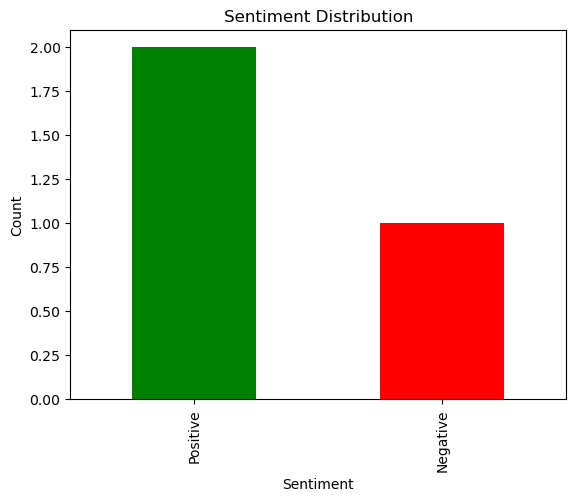

In [36]:
# Visualization
sentiment_distribution = df['Sentiment_Class'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [37]:
# Word cloud (optional)
from wordcloud import WordCloud

positive_texts = ' '.join(df[df['Sentiment_Class'] == 'Positive']['Text'])
negative_texts = ' '.join(df[df['Sentiment_Class'] == 'Negative']['Text'])


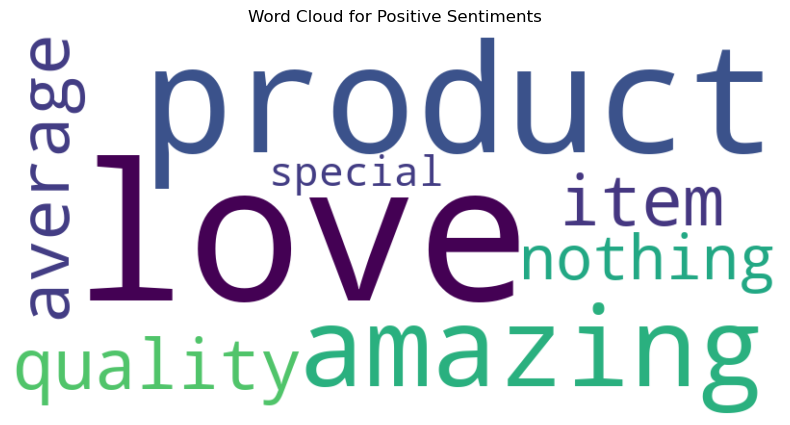

In [38]:
# Word cloud for positive sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')
plt.show()

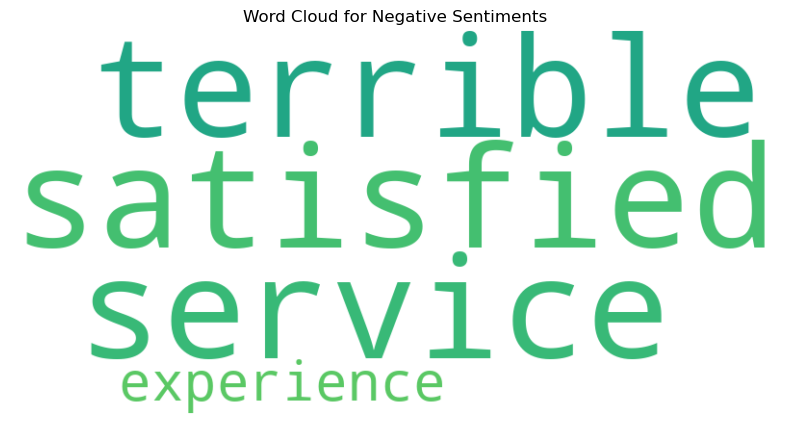

In [39]:
# Word cloud for negative sentiments
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')
plt.show()